In [46]:
# Als je `import clusterizer` typt, dan zoekt Python naar mappen en .py-bestanden met die naam.
# De plekken waar python gaat zoeken staan in de lijst `sys.path`.
# Omdat we nu in SCG-analyse/notebooks zitten, moeten we de bovenliggende map (`SCG-analyse`)
# toevoegen aan de lijst van zoekplekken.
import sys
if ".." not in sys.path:
    sys.path.append("..")

# Hiermee wordt de clusterizer module herladen wanneer een bestand ervan verandert
# (handig als je aan de module aan het werken bent).
# Als je dit niet doet, wordt de code (zoals circuit.py, plot.py, etc) alleen geladen wanneer
# je `import clusterizer` typt. 
%load_ext autoreload
%autoreload 2


import clusterizer

import matplotlib.pyplot as plt

# Nodig om een np.datetime64 tijdstip (zoals in de partial_discharges DataFrame) 
# als ascoordinaat te gebruiken.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Hogere DPI voor plotjes (is mooi)
%config InlineBackend.figure_format = 'retina'
# Standaard grootte van plotjes in inches
plt.rcParams['figure.figsize'] = [8, 5]

import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
clusterizer.globals.datadir

WindowsPath('C:/Users/matth/Desktop/SCG-analyse/data/origineel')

In [48]:
clusterizer.globals.available_circuits

[2145, 3010, 2979, 2980, 1512, 2063, 2870, 2806]

In [40]:
circuitje=clusterizer.circuit.MergedCircuit(1309)
circuitje.build()

<IPython.core.display.Javascript object>


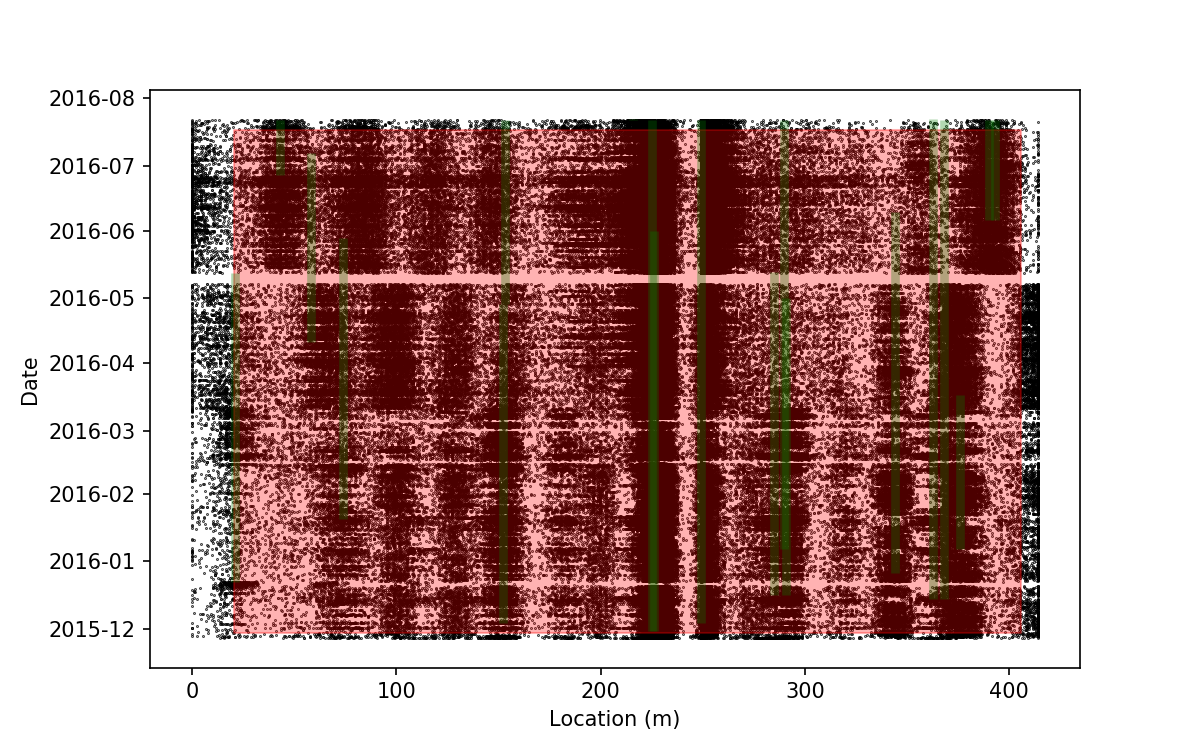

In [43]:
%matplotlib notebook
clusterizer.plot.draw_location_time_scatter(circuitje, dot_size_to_charge_ratio=None)
for cluster in clusterizer.algorithms.clusterize_DBSCAN(circuitje):
    clusterizer.plot.overlay_cluster(cluster, color="red")
clusterizer.plot.overlay_warnings(circuitje)